In [2]:
import numpy as np
from matplotlib import pyplot as plt

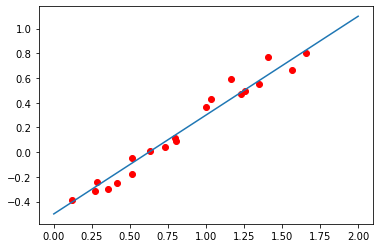

In [3]:
## Create and visualize the data - 2D, roughly linear

# Set the slope parameter and y-intercept for the line
m =  0.8
c = -0.5

# Create a line
x = np.linspace(0., 2., 100)
y = m * x + c

# sample some points and add noise
num_samples = 20
samples = np.random.permutation(100)[:num_samples]

# noise_factor here controls the spread
noise_factor = 0.05
ex = np.random.randn(num_samples) * noise_factor
ey = np.random.randn(num_samples) * noise_factor

# Create the actual dataset
x_data = x[samples] + ex
y_data = y[samples] + ey

# Create the data matrix with the datapoints as rows
X = np.zeros((num_samples, 2))
X[:, 0] = x_data
X[:, 1] = y_data

plt.figure()
plt.plot(x, y)
plt.scatter(x_data, y_data, color='red')
plt.show()

[39.67599954  0.32400046]


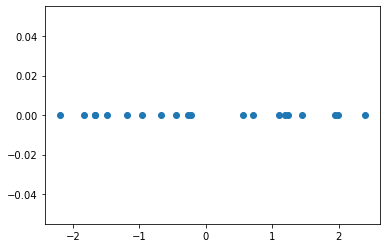

In [4]:
## Implement PCA!!
# Step 1: Column standardization
mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((num_samples, 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

print(eigenvalues)

# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
max_idx = np.argmax(eigenvalues)
X_prime = eigenvectors[:, max_idx].dot(X_st.T)
X_prime_reduced = X_prime

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((num_samples,)))
plt.show()

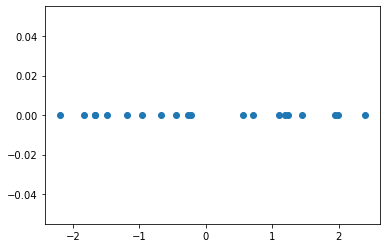

In [5]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(X_st)

plt.figure()
plt.scatter(X_p[:, 0], np.zeros((num_samples,)))
plt.show()